# Zuber, empresa de viajes en Chicago

La empresa Zuber ofrece el servicio de viajes compartidos en taxis en la ciudad de Chicago, Illinois.

Se desea realizar un estudio con los datos proporcionados para identificar patrones en la información disponible, para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Este proyecto se enfoca en realizar un análisis preliminar con los datos que se tienen que corresponden a noviembre de 2017. Se tienen los datos de los viajes terminados en cada barrio de la ciudad, así como los datos del clima durante los viajes, entre otras features, distribuidos en 3 datasets. 

La información proporcionada está distribuida en 3 datasets, con 64, 94 y 1068 registros respectivamente. 

El objetivo principal es analizar el comportamiento de los viajes, determinar los patrones existentes, identificar las preferencias de los clientes que resulten en definitiva, en la identificación de aquellas empresas con mejor desempeño, y destinos preferidos de los clientes que permitan trazar estrategias a posterior que generen más ingresos.

# Tabla de Contenido

* [Inicialización](#Inicialización)     
* [Cargando datos](#Cargando_datos)     
* [Exploración inicial](#Exploración_inicial) 
    * [Limpieza y Preparación de los datos](#Limpieza_y_Preparación_de_los_datos)            
* [Verificación y corrección](#Verificación_y_corrección_de_los_tipos_de_datos) 
* [Exploración de la existencia de datos faltantes](#Exploración_de_existencia_de_datos_faltantes) 
* [Análisis únicamente de los datasets 1 y 2](#Análisis_únicamente_de_los_datasets_1_y_2) 
* [Pruebas de hipótesis](#Pruebas_de_hipótesis) 
* [Conclusión general](#Conclusiones_generales) 

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st

from importlib import reload
plt=reload(plt)

## Cargando_datos

In [2]:
# Carga el archivo de datos

df_trips1 = pd.read_csv('moved_project_sql_result_01.csv')

In [3]:
# Carga el archivo de datos

df_trips2 = pd.read_csv('moved_project_sql_result_04.csv')

In [4]:
# Carga el archivo de datos

df_trips3 = pd.read_csv('moved_project_sql_result_07.csv')

## Exploración_inicial

## Dataset 1

In [5]:
df_trips1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df_trips2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
df_trips3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [9]:
df_trips1.columns

Index(['company_name', 'trips_amount'], dtype='object')

In [8]:
df_trips2.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

In [18]:
df_trips3.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

In [10]:
df_trips1.shape

(64, 2)

In [11]:
df_trips2.shape

(94, 2)

In [17]:
df_trips3.shape

(1068, 3)

In [13]:
df_trips1.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [12]:
df_trips2.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [16]:
df_trips3.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [14]:
df_trips1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [15]:
df_trips2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


## Limpieza_y_Preparación_de_los_datos

### Verificación_y_corrección_de_los_tipos_de_datos

In [20]:
#df_trips3['start_ts'] = df_trips3['start_ts'].astype('int64') 

df_trips3['start_ts'] = pd.to_datetime(df_trips3['start_ts'])
df_trips3

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [21]:
df_trips3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Exploración_de_existencia_de_datos_faltantes 

In [22]:
100*df_trips1.isna().sum()/df_trips1.shape[0] 

company_name    0.0
trips_amount    0.0
dtype: float64

In [24]:
100*df_trips2.isna().sum()/df_trips2.shape[0] 

dropoff_location_name    0.0
average_trips            0.0
dtype: float64

In [23]:
100*df_trips3.isna().sum()/df_trips3.shape[0] 

start_ts              0.0
weather_conditions    0.0
duration_seconds      0.0
dtype: float64

In [25]:
df_trips1.duplicated().sum()

0

In [27]:
df_trips2.duplicated().sum()

0

In [26]:
df_trips3.duplicated().sum()

197

In [28]:
#newdf = df.drop_duplicates()

df_trips31 = df_trips3.drop_duplicates()
df_trips31

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


## Conclusión de la parte de limpieza y preparación de los datos

1- Se revisaron los nombres de las 7 features encontrándose que todas están escritas en minúsculas.

2- Se verificó el tipo de datos de las columnas, y se convirtió la columna 'start_ts' al tipo datetime, en el resto de las features se considera tienen un tipo de datos correcto, y en el dataset 3 se cambió la feature duration_seconds a tipo entero en líneas posteriores. 

3- Se verificó la existencia de filas con datos faltantes, y no se detectó ninguna celda con valor NaN.

4- Se verificó la existencia de filas duplicadas, sin encontrarse registro alguno en los datasets 1 y 2, no obstante, en el dataset 3, se encontraron 197 registros duplicados, que fueron erradicados. 

## Análisis_únicamente_de_los_datasets_1_y_2

In [45]:
df_trips1.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [32]:
df_trips2.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Identificación de los 10 principales barrios en términos de finalización

In [99]:
#s.sort_values(ascending=False).head(5)
df_trips2_short= df_trips2.sort_values(by='average_trips' ,ascending=False).head(10)
df_trips2_short

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<Axes: title={'center': 'Distribution'}, xlabel='dropoff_location_name'>

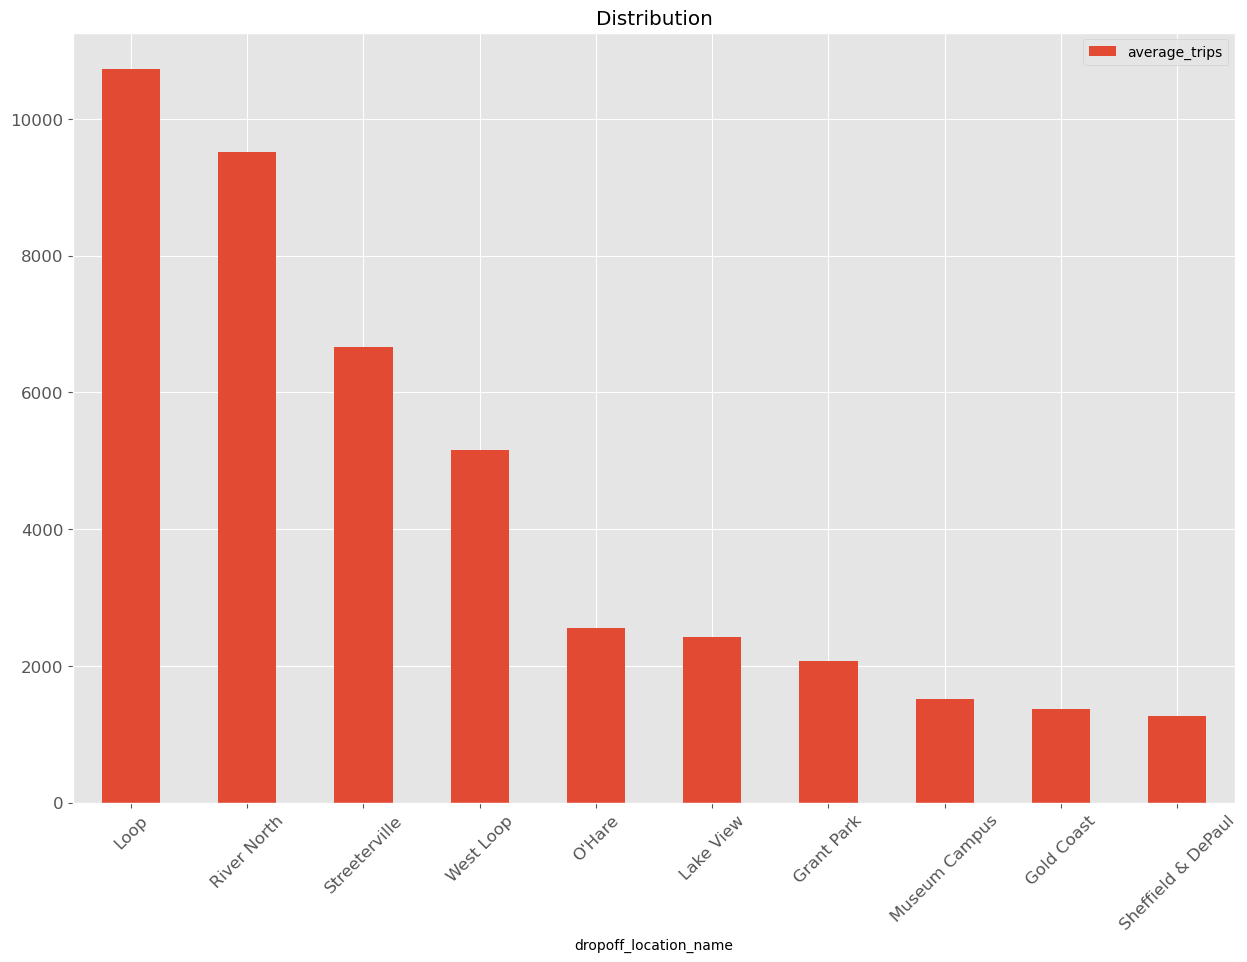

In [100]:
df_trips2_short.plot.bar(x='dropoff_location_name', rot=45, title='Distribution', figsize=(15,10), fontsize=12)

In [101]:
df_trips1_short= df_trips1.sort_values(by='trips_amount' ,ascending=False).head(10)
df_trips1_short

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<Axes: title={'center': 'Distribución de la cantidad de viajes'}, xlabel='company_name'>

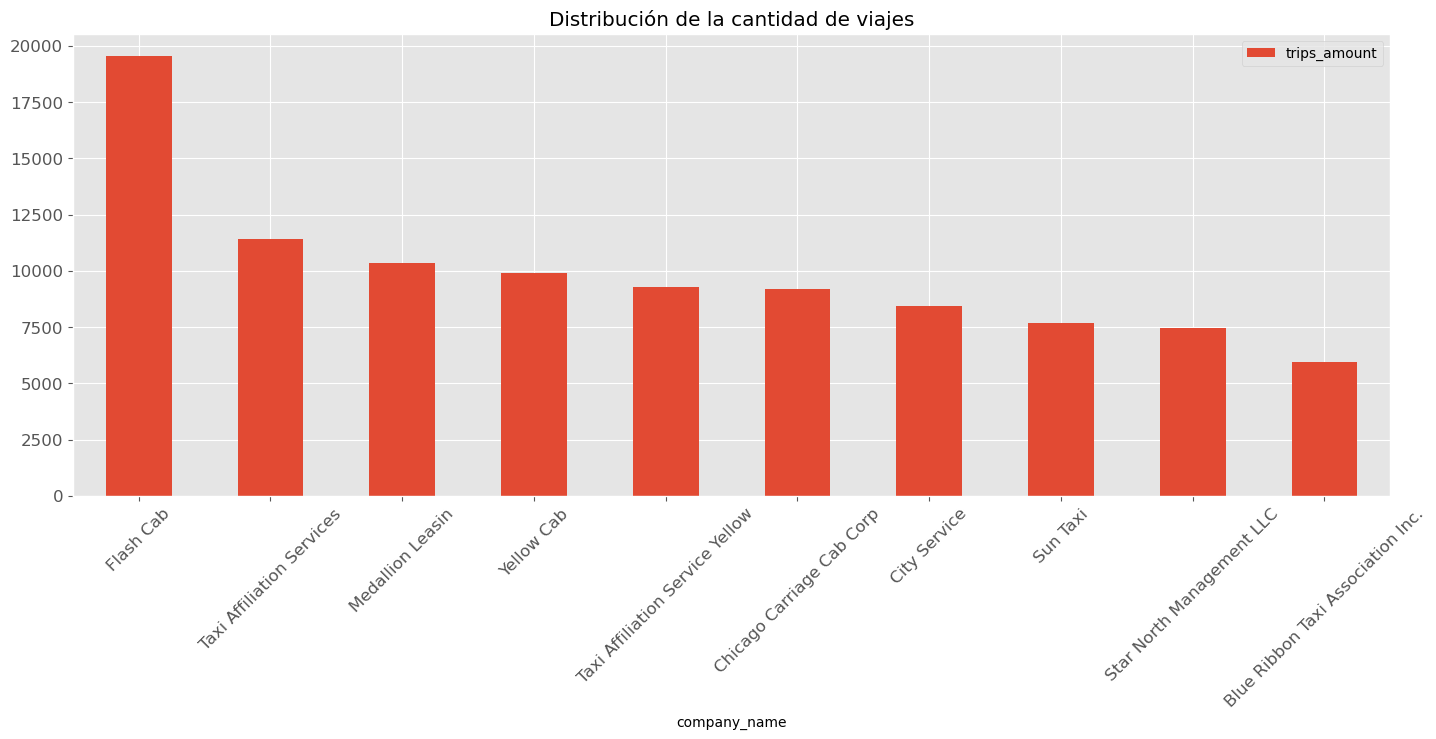

In [102]:
df_trips1_short.plot.bar(x='company_name', rot=45, title='Distribución de la cantidad de viajes', figsize=(17,6), fontsize=12)

## Conclusiones

1. Luego del análisis del gráfico de la Distribución de la cantidad de viajes por barrios incluyendo solamente los 10 principales, se pudo constatar que, el barrio que presenta la mayor cantidad de viajes concluidos es el barrio Loop con 10727.46 viajes concluidos en promedio, en segundo lugar den importancia le sigue el barrio de River North con 9523.6 de viajes concluidos en promedio, seguido de Streeterville con 6664 de viajes concluidos en promedio.   

2. Por otro lado, del gráfico de la Distribución de la cantidad de viajes por empresas, incluyendo solamente las 10 principales, se pudo constatar que la empresa que presenta la mayor cantidad de viajes es la empresa Flash Cab, con apuntalado por 19558 viajes, le siguen por ese orden, Taxi Affiliation Services y Medallion Leasin, 11422 y 10367 viajes respectivamente.

## Prueba_de_hipótesis 

### Definiendo las hipótesis:
H_0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare para los sábados lluviosos es igual.

H_1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare para los sábados no lluviosos es diferente.

### Estadístico de prueba:


### Región de rechazo:

Estadístico t-test utilizado

alpha = 0.05 

In [58]:
df_trips31['duration_seconds'] = df_trips31['duration_seconds'].astype('int64') 

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_28528\4244583377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips31['duration_seconds'] = df_trips31['duration_seconds'].astype('int64')


In [61]:
df_trips31.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.2+ KB


In [63]:
df_trips31.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [97]:
#df_trips31.info()

In [74]:
df_trips31['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [91]:
x = df_trips31['duration_seconds'].mean()
x

2096.308840413318

In [70]:
# Hallando la duración promedio

x = df_trips31[df_trips31['weather_conditions']=='Bad'].groupby(['weather_conditions'])['duration_seconds'].mean()
x

weather_conditions
Bad    2409.22973
Name: duration_seconds, dtype: float64

In [93]:
x = df_trips31[df_trips31['weather_conditions']=='Bad']['duration_seconds'].mean()
x

2409.2297297297296

In [92]:
y = df_trips31[df_trips31['weather_conditions']=='Good']['duration_seconds'].mean()
y

2032.253112033195

In [95]:
# Prueba de Levene

x = df_trips31[df_trips31['weather_conditions']=='Bad']['duration_seconds']
y = df_trips31[df_trips31['weather_conditions']=='Good']['duration_seconds']

st.levene(x, y)

LeveneResult(statistic=0.000586951625283602, pvalue=0.9806770360671218)

El resultado del test de levene arroja 0.00058 en el estadístico de prueba y 0.98 en el p-value, siendo éste último mayor que el nivel de significancia, tras lo cual no hay evidencia suficiente para rechazar la hipótesis nula, por tanto las varianzas de las poblaciones son iguales.

In [96]:
st.ttest_ind(x, y, equal_var = True)

Ttest_indResult(statistic=5.427957689754561, pvalue=7.397770692813658e-08)

Se aplicó la prueba T-test, obteniéndose un p-valor de 7.39 y 5.42 para el estadístico, notando que el p-valor es mayor que el nivel de significancia, tras lo cual se rechaza la hipótesis nula, y se considera que la duración promedio procedente de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos es diferente.

## Conclusiones_generales

A continuación, se enumeran todas las acciones y conclusiones a las que se arribaron: 

1- Se revisaron los nombres de las 7 features encontrándose que todas están escritas en minúsculas.

2- Se verificó el tipo de datos de las columnas, y se convirtió la columna 'start_ts' al tipo datetime, en el resto de las features se considera tienen un tipo de datos correcto, y en el dataset 3 se cambió la feature duration_seconds a tipo entero en líneas posteriores. 

3- Se verificó la existencia de filas con datos faltantes, y no se detectó ninguna celda con valor NaN.

4- Se verificó la existencia de filas duplicadas, sin encontrarse registro alguno en los datasets 1 y 2, no obstante, en el dataset 3, se encontraron 197 registros duplicados, que fueron erradicados. 

5- Luego del análisis del gráfico de la Distribución de la cantidad de viajes por barrios incluyendo solamente los 10 principales, se pudo constatar que, el barrio que presenta la mayor cantidad de viajes concluidos es el barrio Loop con 10727.46 viajes concluidos en promedio, en segundo lugar den importancia le sigue el barrio de River North con 9523.6 de viajes concluidos en promedio, seguido de Streeterville con 6664 de viajes concluidos en promedio.   

6- Por otro lado, del gráfico de la Distribución de la cantidad de viajes por empresas, incluyendo solamente las 10 principales, se pudo constatar que la empresa que presenta la mayor cantidad de viajes es la empresa Flash Cab, con apuntalado por 19558 viajes, le siguen por ese orden, Taxi Affiliation Services y Medallion Leasin, 11422 y 10367 viajes respectivamente.

7- Se realizó el test de levene que arrojó 0.00058 en el estadístico de prueba y 0.98 en el p-value, siendo éste último mayor que el nivel de significancia, tras lo cual no hay evidencia suficiente para rechazar la hipótesis nula, por tanto las varianzas de las poblaciones son iguales.

8- Finalmente, se aplicó la prueba T-test, obteniéndose un p-valor de 7.39 y 5.42 para el estadístico, notando que el p-valor es mayor que el nivel de significancia, tras lo cual se rechaza la hipótesis nula, y se considera que la duración promedio procedente de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos es diferente.